# Part I - Propser Loan Data
## by (Samson Amwata)

## Introduction
This dataset contains loan information of about 113,937 rows with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?



## Preliminary Wrangling


In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> We have 113937 rows and 81 columns or features. From describe function it seems most of the features are numeric, some are categorical and others are time/periodical features 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in borrowers features and features related to loan or those that affect loan performance. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I will be focusing on the following columns that I suspect has effect on the loan performance  

``` 
[ListingNumber, CreditGrade',Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, BorrowerState, Occupation, EmploymentStatus, InvestmentFromFriendsCount, InvestmentFromFriendsAmount,LoanOriginalAmount,ProsperRating (Alpha),IncomeRange', StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanOriginalAmount, LoanOriginationDate,  MonthlyLoanPayment and Investors ]
```

In [7]:
columns_sub = ['ListingNumber', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 
               'BorrowerRate', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'InvestmentFromFriendsCount', 
               'InvestmentFromFriendsAmount', 'LoanOriginalAmount', 'ProsperRating (Alpha)','IncomeRange', 
               'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanOriginationDate',  
               'MonthlyLoanPayment', 'Investors' ]
loan_df = df[columns_sub]
loan_df.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,InvestmentFromFriendsAmount,LoanOriginalAmount,ProsperRating (Alpha),IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,0.0,9425,NaN,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,258
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,0.0,10000,A,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,1
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,0.0,3001,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,41
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,0.0,10000,A,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,158
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,0.0,15000,D,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,20


In [8]:
#Rename ProsperRating (Alpha) column by removing the (Alpha)
loan_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)
loan_df.head()

C:\Users\samso\AppData\Local\Temp\ipykernel_444\2014221369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)


,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,InvestmentFromFriendsAmount,LoanOriginalAmount,ProsperRating,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,0.0,9425,NaN,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,258
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,0.0,10000,A,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,1
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,0.0,3001,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,41
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,0.0,10000,A,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,158
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,0.0,15000,D,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,20


In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   CreditGrade                  28953 non-null   object 
 2   Term                         113937 non-null  int64  
 3   LoanStatus                   113937 non-null  object 
 4   ClosedDate                   55089 non-null   object 
 5   BorrowerAPR                  113912 non-null  float64
 6   BorrowerRate                 113937 non-null  float64
 7   BorrowerState                108422 non-null  object 
 8   Occupation                   110349 non-null  object 
 9   EmploymentStatus             111682 non-null  object 
 10  InvestmentFromFriendsCount   113937 non-null  int64  
 11  InvestmentFromFriendsAmount  113937 non-null  float64
 12  LoanOriginalAmount           113937 non-null  int64  
 13 

## Data cleaning

#### Definition of data cleaning issues
1. Remove duplicates rows
2. Convert the date columns to date data type
3. Rename ProsperRating (Alpha) column to `ProsperRating`
4. Replace `NaT` dates to Null
5. 


In [10]:
#check for duplicates
loan_df.duplicated().sum()

871

In [11]:
#Drop the duplicate rows
loan_df.drop_duplicates(keep=False, inplace=True)

C:\Users\samso\AppData\Local\Temp\ipykernel_444\3896928886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.drop_duplicates(keep=False, inplace=True)


In [12]:
#Check to confirm if we still have duplicate rows
loan_df.duplicated().sum()

0

In [13]:
#Convert ClosedDate and LoanOriginationDate column to datetime data type
loan_df["ClosedDate"]=pd.to_datetime(loan_df["ClosedDate"])
loan_df["LoanOriginationDate"]=pd.to_datetime(loan_df["LoanOriginationDate"])

C:\Users\samso\AppData\Local\Temp\ipykernel_444\3640516210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["ClosedDate"]=pd.to_datetime(loan_df["ClosedDate"])
C:\Users\samso\AppData\Local\Temp\ipykernel_444\3640516210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df["LoanOriginationDate"]=pd.to_datetime(loan_df["LoanOriginationDate"])


In [14]:
#After converting now check the column
loan_df.ClosedDate[:5]

0   2009-08-14
1          NaT
2   2009-12-17
3          NaT
4          NaT
Name: ClosedDate, dtype: datetime64[ns]

In [15]:
#After converting now check the column
loan_df.LoanOriginationDate[:5]

0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate, dtype: datetime64[ns]

In [16]:
loan_df['ClosedDate_test'] = loan_df['ClosedDate'].replace("NaT", np.nan)
loan_df.ClosedDate_test[:10]

C:\Users\samso\AppData\Local\Temp\ipykernel_444\718164740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['ClosedDate_test'] = loan_df['ClosedDate'].replace("NaT", np.nan)


0    2009-08-14
1           NaT
2    2009-12-17
3           NaT
4           NaT
5           NaT
6           NaT
7           NaT
10          NaT
11   2008-01-07
Name: ClosedDate_test, dtype: datetime64[ns]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### BorrowerRate
The **BorrowerRate** - Is the interest rate on the annual cost of a loan to  a borrower which is expressed as a percentage. 

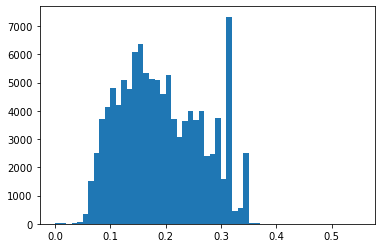

In [35]:
def borrower_rate():
  # data setup
    bins = np.arange(0, loan_df.BorrowerRate.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins, color=base_color)

borrower_rate()

### BorrowerAPR
The **BorrowerAPR** - Is the annual cost of the loan which contains other fees like discounts and other deductions.

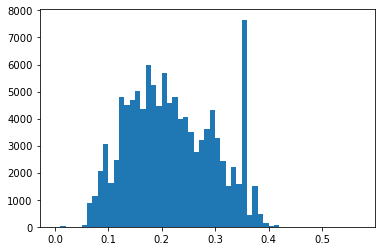

In [37]:
def borrower_apr():
  # data setup
    bins = np.arange(0, loan_df.BorrowerAPR.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins, color=base_color)
borrower_apr()

The distribution of Borrower rate and Borrower APR looks multimodal. A large peak centered at 0.2 but there is a very high increase between 0.35 and 0.36.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

